[![CraigDoesData][logo]][link]

[logo]: ./img/logo.png
[link]: https://www.craigdoesdata.de/


# Linear Regression - Real Data
Machine Learning training project utilising [TensorFlow](https://www.tensorflow.org/) to build an ML model and make predictions.

#### Project status - Complete

## Introduction

My focus here was not so much to build a high quality model or to make accurate predictions, but rather to become familiar with the code and simply to be able to build a functioning model.

This was based on examples used in the excellent [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro) offered by Google.



### Methods used
* EDA
* Machine Learning
* Data visualisation

### Technologies used
* [Jupyter Notebook](https://jupyter.org/)
* [pandas](https://pandas.pydata.org/)
* [TensorFlow](https://www.tensorflow.org/)
* [Matplotlib](https://matplotlib.org/)

### Data sources
[California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) based on the 1990 US Census. This is a familiar dataset for Machine Learning training, so apologies for the lack of originality! 

Sourced from [Google](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv).

#### Features and Labels
The [Label](https://pythonprogramming.net/features-labels-machine-learning-tutorial/) (the 'target' of our model, the attribute of the data that we want to output as a prediction when it is built) is median_house_value. The [features](https://pythonprogramming.net/features-labels-machine-learning-tutorial/) are the other attributes of the dataset. 

As with all ML applications there are ethical considerations to take into account when selecting our features, and it is vital to keep this in mind. In this project the model will not be used for anything in the real world, so will not impact anyone negatively or positively, so we don't need to worry about this.





---------------------


## Table of Contents

#### 1. Import and Inspection
* 1.1 Library and Data Import
* 1.2 Data Inspection

#### 2. Examine Features
* 2.1 Create Correlation Matrix

#### 3. Define Functions
* 3.2 Define Functions to Build and Train the Model
* 3.2 Define Functions to Plot the Model and to Plot the Loss Curve

#### 4. Build and Train the Model
* 4.1 Set Hyperparameters, Specify Feature and Label
* 4.2 Call Functions

#### 5. Make Predictions
* 5.1 Define Prediction Function
* 5.2 Call Prefiction Function

#### 6. Conclusion
* 6.1 Conclusion

--------------------------

### 1. Import and Inspection

##### 1.1 - Library and Data Import

The first step is to import our libraries ([pandas](https://pandas.pydata.org/), [TensorFlow](https://www.tensorflow.org/) and [matplotlib.pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html), and use [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to read the CSV file containing our Badestellen data into a [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). 

In this case we will scale the label (median_house_value), dividing it by 1,000 to display the values in thousands of US Dollars. This simply makes it nicer to work with and will keep our loss values in a reasonable range later on.

In [1]:
import pandas as pd
import tensorflow as tf #I used TensorFlow 2.1.0 for this project.
from matplotlib import pyplot as plt

# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")


# Scale the label.
training_df["median_house_value"] /= 1000.0

##### 1.2 - Data Inspection

Let's use [.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) to see the first few rows of data.

In [2]:
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


We can use [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to get descriptive statistics on all of the columns

In [3]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


--------------------------

### 2. Examine Features

##### 2.1 - Create a Correlation Matrix

Using pandas [.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) functionality to easily create a correlation matrix allows us to easily see which (if any) features correlate with our chosen label.

In [4]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


Our chosen label, median_house_value, is weakly correlated with all but one of the features. There is a positive correlation of 0.69 between median_income and median_house_value. That is promising - certainly the most promising of the available features.

-----------------------
### 3. Define Functions

##### 3.1 - Define Functions to Build and Train the Model

These functions are used to build the model based on our inputs, and to train the model on the data in our DataFrame. These are taken directly from the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro).

In [5]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

##### 3.2 - Define Functions to Plot the Model and to Plot the Loss Curve

These functions are used to plot the model itself, and to plot the loss curve (so we can see if we are approaching the minimum, if our model has [converged](https://ai.stackexchange.com/questions/16348/what-is-convergence-in-machine-learning). These are taken directly from the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro).

In [6]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 20
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

-----------------------
### 4. Build and Train the Model

##### 4.1 - Set Hyperparameters, Specify Feature and Label

The [Hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_optimization) must be tuned to find an optimum solution to build and train the model. 

I have done this through trial and error, and we can verify that a minimum has been approached (i.e. our model has indeed converged) by viewing the loss curve as output in the next code cell. There may well be more optimal solutions for our dataset, but this one is sufficient for the purposes of this project.

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 10
batch_size = 30

# Specify the feature and the label.
my_feature = "median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

##### 4.2 - Call Functions

Now that the hyperparameters are tuned and the feature and label have been specified, it is time to build and train the model. The first step is to clear any pre-existing versions of the model, and then call the appropriate functions with the appropriate inputs.

Train on 17000 samples
Epoch 1/10
17000/17000 [==============================] - 1s 79us/sample - loss: 32598.8645 - root_mean_squared_error: 180.5516
Epoch 2/10
17000/17000 [==============================] - 1s 50us/sample - loss: 8482.3133 - root_mean_squared_error: 92.0995
Epoch 3/10
17000/17000 [==============================] - 1s 49us/sample - loss: 7014.2078 - root_mean_squared_error: 83.7509
Epoch 4/10
17000/17000 [==============================] - 1s 68us/sample - loss: 7012.9540 - root_mean_squared_error: 83.7434
Epoch 5/10
17000/17000 [==============================] - 1s 48us/sample - loss: 7014.6651 - root_mean_squared_error: 83.7536
Epoch 6/10
17000/17000 [==============================] - 1s 48us/sample - loss: 7013.9879 - root_mean_squared_error: 83.7496
Epoch 7/10
17000/17000 [==============================] - 1s 50us/sample - loss: 7015.4414 - root_mean_squared_error: 83.7582
Epoch 8/10
17000/17000 [==============================] - 1s 49us/sample - loss: 7014.1970 - 

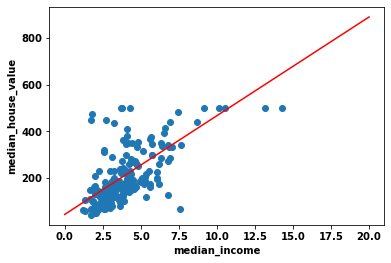

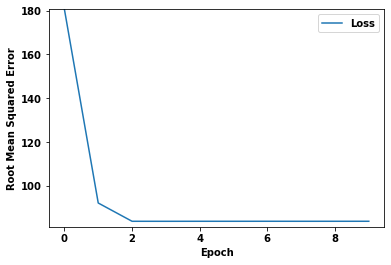

In [8]:
# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

We can see here that the [Root Mean Squared Error](https://www.oreilly.com/library/view/machine-learning-with/9781785889936/669125cc-ce5c-4507-a28e-065ebfda8f86.xhtml) comes down to in the range 83 - 86 and the loss to around 7015 (as the samples used in each batch are randomly selected, you may see slightly different numbers when you run this, but they should be close to these values).

The loss curve flattens out, and in repeated epochs we can see he loss doesn't decrease further. This indicates that our model has converged at this point.

-----------------------
### 5. Make Predictions

##### 5.1 - Define Prediction Function

It is good practice to define this as a function, so it can be called repeatedly.

In [9]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

##### 5.2 - Call Prediction Function

The next step is to call this function. We will make 10 predictions.

In [10]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             135
    4     92             213
    3     69             155
    2     62             133
    3     80             154
    2    295             148
   10    500             458
    5    342             261
    2    118             147
    4    128             222


The predictions are not fantastic, but neither are they worthless. It is clear that the model has learned something in the training process. 



---------------

### 6. Conclusion

##### 6.1 - Conclusion

In this project, I successfully used TensorFlow to build and train a (very simple) Machine Learning model, which I then used to make predictions. The code and the functions worked, I was able to tune the hyperparameters to find a minimum on the loss function curve, and the prediction model successfully produced predictions.

There are numerous ways to assess the accuracy and improve the functioning of this model (using more than one feature would be a good place to start), but these are beyond the scope of this project.